<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/Outlier_Removal_using_Z_score_%26_Std_Deviation_Excercise_BHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

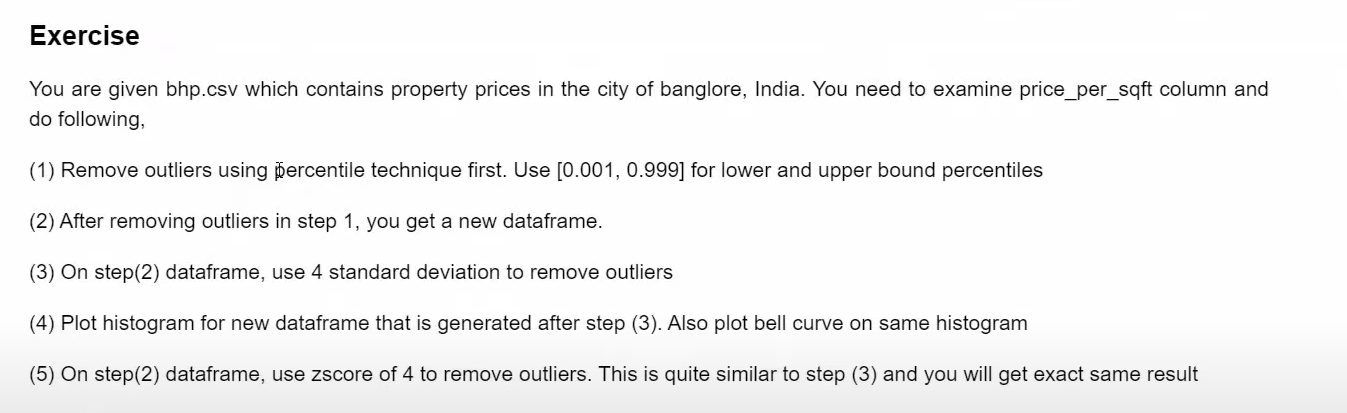

# ***Mounting Google Drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/py-master/ML/FeatureEngineering/2_outliers_z_score/Exercise/'

2_outliers_z_score_exercise.ipynb  bhp.csv


# ***Import Libraries***

In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ***Load and Explore data***

In [6]:
df= pd.read_csv('/content/drive/MyDrive/py-master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv')
df.head(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245


(array([1.3198e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.67000000e+02, 1.20024030e+06, 2.40021360e+06, 3.60018690e+06,
        4.80016020e+06, 6.00013350e+06, 7.20010680e+06, 8.40008010e+06,
        9.60005340e+06, 1.08000267e+07, 1.20000000e+07]),
 <a list of 10 Patch objects>)

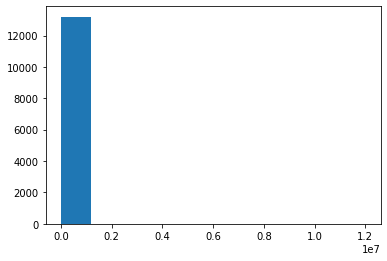

In [7]:
plt.hist(df.price_per_sqft)

# ***Remove Values based on Quantiles***

In [13]:
df2 = df[(df.price_per_sqft>df.price_per_sqft.quantile(0.01)) & (df.price_per_sqft<df.price_per_sqft.quantile(0.99)) ]

In [14]:
df.shape[0]-df2.shape[0]

268

(array([4279., 4819., 1799.,  697.,  461.,  344.,  237.,  133.,  110.,
          53.]),
 array([ 2550. ,  4662.4,  6774.8,  8887.2, 10999.6, 13112. , 15224.4,
        17336.8, 19449.2, 21561.6, 23674. ]),
 <a list of 10 Patch objects>)

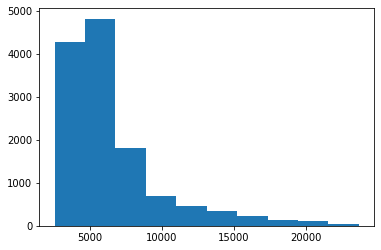

In [15]:
plt.hist(df2.price_per_sqft)

# ***Remove Values based on Standard deviation***

In [27]:
usl = df.price_per_sqft.mean()+3*df2.price_per_sqft.std()
lsl = df.price_per_sqft.mean()-3*df2.price_per_sqft.std()

In [28]:
usl,lsl

(18425.53141213343, -2584.8579272849474)

In [29]:
df3 = df2[(df2.price_per_sqft>lsl) & (df2.price_per_sqft<usl) ]

In [30]:
df.shape[0]-df3.shape[0]

486

(array([2783., 4431., 2535., 1154.,  541.,  403.,  306.,  246.,  201.,
         114.]),
 array([ 2550.,  4135.,  5720.,  7305.,  8890., 10475., 12060., 13645.,
        15230., 16815., 18400.]),
 <a list of 10 Patch objects>)

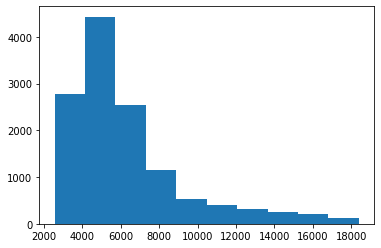

In [31]:
plt.hist(df3.price_per_sqft)

# ***Remove Values based on Z score***

In [32]:
df3= df2.copy()
df3['Zscore'] = ((df.price_per_sqft- df.price_per_sqft.mean())/df.price_per_sqft.std())
df4 = df3[(df3.Zscore<3)&(df3.Zscore>-3)]

In [33]:
df.shape[0]-df4.shape[0]

268